# Lab session of 31/05/2023

## Problem 1: CVRP

The Capacitated Vehicle Routing Problem (CVRP) is a generalization of the Traveling Salesman Problem (TSP) where a fleet of vehicles $K$ is available to serve a set of customers. Each vehicle has a limited capacity and the goal is to find a set of routes that minimizes the total travel cost while serving all customers and respecting the capacity constraint of each vehicle.

In particulat, let $G = (V, A)$ be a complete graph, where $V = \{0,...,n\}$ is the vertex set and $A$ is the arc set. Vertices $i = 1,...,n$ correspond to the customers, whereas vertex $0$ corresponds to the depot. A nonnegative cost, $c_{ij}$, is associated with each arc $(i,j) \in A$ and represents the travel cost spent to go from vertex $i$ to vertex $j$. We suppose that $c_{ii} = \infty$ for all $i \in V$.

Each customer $i \in V$ is associated with a known nonnegative demand to be delivered, $d_i$, and the depot has a fictitious demand $d_0 = 0$. 

A set $K$ of identical vehicles, each with capacity $C$, is available at the depot. To ensure feasibility we assume that $d_i \le C$ for each $i \in V$ and that we have a sufficient amount of vehicles to serve all customers.

Given a vertex set $S \subseteq V \setminus \{0\}$, let $d(S) = \sum_{i \in S}{d_i}$ denote the total demand of the set. We denote with $r(S)$ the minimum number of vehicles needed to serve the total demand of $S$, i.e., $r(S) = \lceil d(S)/C \rceil$.

The CVRP consists of finding a collection of vehicle routes with minimum cost, defined as the sum of the costs of the arcs belonging to each route, and such that:
* each route starts and finishes at the depot vertex;
* each customer vertex is visited by exactly one route; 
* the sum of the demands of the vertices visited by a route does not exceed the vehicle's capacity $C$.

## Greedy Algorithm

1.   Start from an empty set of routes.
2.   Repeat while you have unrouted customers:
    1. Create an empty route $R$ starting from the depot
    2. Repeat while you have unrouted customers and the route $R$'s last node is not the depot:
        1. Select the unrouted node (or depot) $i$ that is closest to the last node $j$ in the route
        2. If $d_i + d(R) \le C$ then add $i$ to the route

In [1]:
import numpy as np
import math

n = 8       # number of nodes
max_d = 10  # max demand per node
C = 30      # capacity of each vehicle

grid_size = 100 # size of the grid of points

np.random.seed(1337)

# Create k random points with two coordinates. Multiplying by grid_size yields
# random numbers between 0 and 100.
point = grid_size * np.random.random((n,2))

d = np.random.choice(np.arange(1, max_d), size=n)

k = int(np.ceil(np.sum(d) / C))

K = [i for i in range(k)]

# Define the set of vertices of the graph as the list of numbers from 0 to k-1
V = [i for i in range(n)]

# Determine the distance between each point
c = np.array([[math.sqrt(np.sum((point[i] - point[j])**2)) for i in V] for j in V])

# Set C[i,i] to an arbitrarily large value to forbid usage of x[i,i]
for i in V:
  c[i,i] = 10000000

print(n)
print(C)
print(k)
print(k)

8
30
2
2


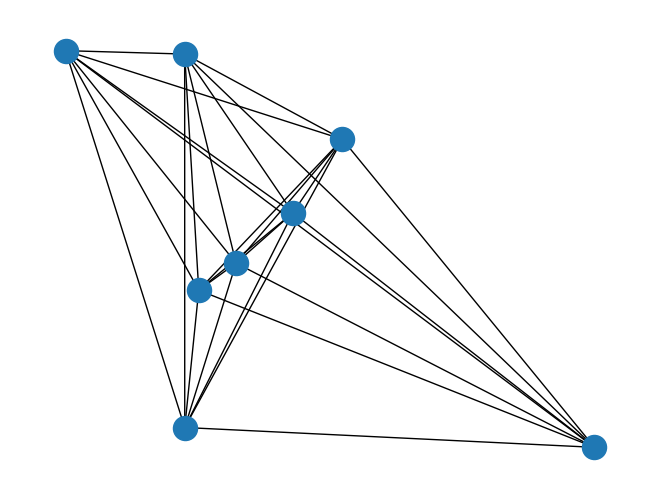

In [2]:
import networkx as nx

# Set of arcs
A = [(i,j) for i in V for j in V if i != j]

# Define a dictionary whose keys are the nodes, and the values are tuples
# containing the (x,y) coordinates of each point
coord = {i: (point[i,0], point[i,1]) for i in V}

g = nx.Graph()

g.add_nodes_from(V)
g.add_edges_from(A)

nx.draw(g, pos=coord)

In [7]:
# A route is represented as a list of integers (visited customers), starting 
# with 0 (depot) and ending with 0.

def get_sorted_neighbors(v):
  neighs = {}
  for (i,j) in A:
    if i == v:
      neighs[j] = c[i,j]
  return list(sorted(neighs, key=lambda x: neighs[x]))
  

routes = []
to_process = set(V)
to_process.remove(0)

while to_process:
  route = [0]
  demand = 0
  
  prev = -1
  while to_process and prev != 0:
    candidates = get_sorted_neighbors(route[-1])

    best = 0
    for cn in candidates:
      if (cn in to_process and demand + d[cn] <= C) or cn == 0:
        best = cn
        break

    if best != 0:
      to_process.remove(best)
    
    route.append(best)
    demand += d[best]
    prev = route[-1]

  routes.append(route)

obj = 0
for route in routes:
  cost = 0
  for k in range(len(route)):
    if k == 0:
      continue
    cost += c[route[k-1], route[k]]
  obj += cost
  print(route, cost)

print(obj)

[0, 1, 2, 5, 7, 3, 0] 175.0397707261008
[0, 4, 0] 94.55739313729676
[0, 6] 83.61588084809803
353.21304471149557


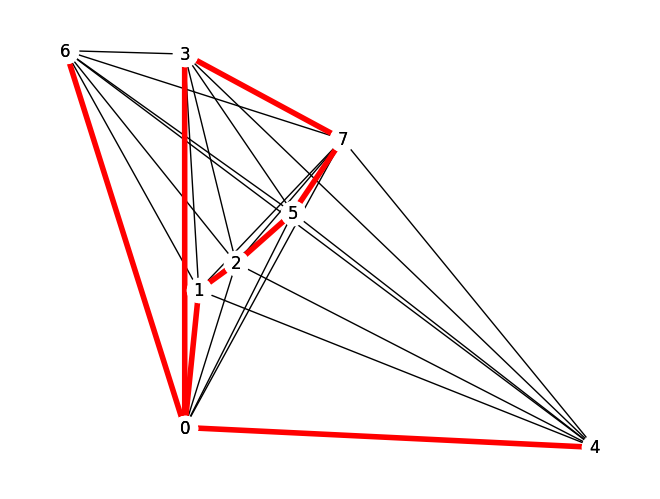

In [8]:
def draw_solution(V, A, routes):
    g = nx.Graph()

    # Draw the whole graph first: all nodes, all arcs, no highlighting
    g.add_nodes_from(V)
    g.add_edges_from([(i,j) for (i,j) in A])
    nx.draw(g, pos=coord, with_labels=True, node_color="white")

    # Reset the graph and add only the arcs that belong to the solution, 
    # i.e. those for which the optimal value of the variable x[i,j] is nonzero
    g.clear()

    route_edges = []
    for r in routes:
      for k in range(len(r)):
        if k == 0:
          continue
        route_edges.append((r[k-1], r[k]))

    g.add_edges_from(route_edges)
    nx.draw(g, pos=coord, width=4, edge_color='red', with_labels=True, node_color='white')

    # finally, draw a graph consisting of the sole root node, highlighted in green
    g.clear()
    g.add_node(0)
    nx.draw(g, pos={0: coord[0]}, node_color='white', with_labels=True)

draw_solution(V, A, routes)